### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [119]:
tf.__version__

'1.13.1'

### Collect Data

In [0]:
import keras

In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [123]:
trainX.shape

(60000, 28, 28)

In [124]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [125]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000,)
First 5 examples now are:  [9 0 0 3 0]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [0]:
import matplotlib.pyplot as plt

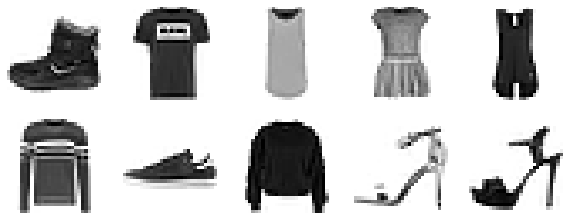

In [127]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

model.add(tf.keras.layers.Dense(10, activation='sigmoid'))



In [0]:
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD()

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


### Execute the model using model.fit()

In [130]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 6s 105us/sample - loss: 2.3199 - acc: 0.0999 - val_loss: 2.3005 - val_acc: 0.1000
Epoch 2/3
60000/60000 [==============================] - 6s 103us/sample - loss: 2.2769 - acc: 0.1000 - val_loss: 2.2665 - val_acc: 0.1000
Epoch 3/3
60000/60000 [==============================] - 6s 103us/sample - loss: 2.2653 - acc: 0.1000 - val_loss: 2.2357 - val_acc: 0.0996


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(10, activation='sigmoid'))

### Execute the model

In [0]:
sgd_optimizer = tf.keras.optimizers.SGD()

model.compile(optimizer=sgd_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [133]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 7s 124us/sample - loss: 1.3530 - acc: 0.6242 - val_loss: 1.1111 - val_acc: 0.6453
Epoch 2/3
60000/60000 [==============================] - 7s 120us/sample - loss: 0.9395 - acc: 0.6574 - val_loss: 0.7663 - val_acc: 0.6960
Epoch 3/3
60000/60000 [==============================] - 7s 119us/sample - loss: 0.6475 - acc: 0.7674 - val_loss: 0.5503 - val_acc: 0.8055


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)

model.compile(optimizer=sgd_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [135]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 7s 125us/sample - loss: 0.5340 - acc: 0.8145 - val_loss: 0.5332 - val_acc: 0.8132
Epoch 2/2
60000/60000 [==============================] - 7s 121us/sample - loss: 0.5214 - acc: 0.8206 - val_loss: 0.5248 - val_acc: 0.8160


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [0]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

model.compile(optimizer=sgd_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [138]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 9s 143us/sample - loss: 1.0371 - acc: 0.6958 - val_loss: 0.6293 - val_acc: 0.7764
Epoch 2/2
60000/60000 [==============================] - 8s 137us/sample - loss: 0.5703 - acc: 0.7986 - val_loss: 0.5212 - val_acc: 0.8105


## Review model

In [139]:
test_loss, test_acc = model.evaluate(testX, testY)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 74us/sample - loss: 0.5212 - acc: 0.8105
Test accuracy: 0.8105


### Run the model

In [0]:
predictions = model.predict(testX)

In [141]:
#first prediction
predictions[0]

array([0.00058218, 0.00095364, 0.00119679, 0.00175706, 0.00130979,
       0.15153728, 0.00118323, 0.2647541 , 0.01744087, 0.5592851 ],
      dtype=float32)

In [142]:
import numpy as np
np.argmax(predictions[0])

9

In [143]:
class_names[9]

'Ankle boot'